In [1]:
from matplotlib import pyplot as plt
import pickle
import matplotlib
import re
from math import sqrt
import numpy as np
from scipy.optimize import curve_fit
from scipy import interpolate
import sys
sys.path.insert(0, './')
sys.path.insert(0, '../')
from analyze_asiii import *
%matplotlib notebook

In [2]:
# important information

fit_set = 1
fit_set2 = 2
test_set = 1
test_set2 = 2

fit_blanks = 'Blanks.txt'
fit_add = 'Add' + str(fit_set) + '.txt'

fit_blanks2 = 'Blanks.txt'
fit_add2 = 'Add' + str(fit_set2) + '.txt'

test_blanks = 'Test_Blanks.txt'
test_add = 'Test_Add' + str(test_set) + '.txt'

test_blanks2 = 'Test_Blanks.txt'
test_add2 = 'Test_Add' + str(test_set2) + '.txt'

num_cols = 12
num_rows = 8

nm_start = 400
nm_step = 10
nm_end = 700
nms = np.arange(nm_start,nm_end + nm_step,nm_step)

la_concs_fit = np.arange(0,1*12,1)
yb_concs_fit = np.arange(0,1.5*8,1.5)

la_concs_test = np.arange(0.5,0.5+1*12,1)
yb_concs_test = np.arange(0.5,0.5+1.5*8,1.5)

In [3]:
# reads text files and subtracts blanks from arsenazo plots

# reads all the data
wells_blanks_fit = read_file(fit_blanks, num_cols, nm_start, nm_end, nm_step)
wells_add_fit = read_file(fit_add, num_cols, nm_start, nm_end, nm_step)

wells_blanks_fit2 = read_file(fit_blanks2, num_cols, nm_start, nm_end, nm_step)
wells_add_fit2 = read_file(fit_add2, num_cols, nm_start, nm_end, nm_step)

wells_blanks_test = read_file(test_blanks, num_cols, nm_start, nm_end, nm_step)
wells_add_test = read_file(test_add, num_cols, nm_start, nm_end, nm_step)

wells_blanks_test2 = read_file(test_blanks2, num_cols, nm_start, nm_end, nm_step)
wells_add_test2 = read_file(test_add2, num_cols, nm_start, nm_end, nm_step)

# subtracts blanks from arsenazo data
for well in wells_add_fit:
    wells_add_fit[well] -= wells_blanks_fit[well]
    wells_add_fit2[well] -= wells_blanks_fit2[well]
    wells_add_test[well] -= wells_blanks_test[well]
    wells_add_test2[well] -= wells_blanks_test2[well]

# Fitting Stuff

In [4]:
# fits multi wavelength splines to both rees (uses all data)

small = 0
big = 12
step = 0.05


ree1s = []
ree2s = []

for r in range(1,9):
    for c in range(1,13):
        ree1s.append(la_concs_fit[c-1])
        ree2s.append(yb_concs_fit[r-1])

abses = []
for idx in range((600 - nm_start) // nm_step, ((670 - nm_start) // nm_step) + 1):
    ab = []
    for r in range(1,9):
        for c in range(1,13):
            ab.append(wells_add_fit[(r,c)][idx])
    abses.append(ab)
    
splines, weights = get_2ree_spline(ree1s, ree2s, abses)
maps = get_2ree_spline_maps(splines, small, big, step, small, big, step)

In [8]:
# fits multi wavelength splines to both rees (uses all data)

small = 0
big = 12
step = 0.05


ree1s = []
ree2s = []

for r in range(1,9):
    for c in range(1,13):
        ree1s.append(la_concs_fit[c-1])
        ree2s.append(yb_concs_fit[r-1])

abses = []
for idx in range((600 - nm_start) // nm_step, ((670 - nm_start) // nm_step) + 1):
    ab = []
    for r in range(1,9):
        for c in range(1,13):
            ab.append(wells_add_fit[(r,c)][idx])
    abses.append(ab)
    
splines, weights = get_2ree_spline(ree1s, ree2s, abses)
maps = get_2ree_spline_maps(splines, small, big, step, small, big, step)

In [9]:
# fits data used for spline

ree1_labels = []
ree2_labels = []
for i in range(len(la_concs_fit)):
    ree1_labels.append('La ' + str(la_concs_fit[i]) + ' uM')
for i in range(len(yb_concs_fit)):
    ree2_labels.append('Yb ' + str(yb_concs_fit[i]) + ' uM')

diff_la = np.zeros((12,8))
diff_yb = np.zeros((12,8))

diff_la_perc = np.zeros((12,8))
diff_yb_perc = np.zeros((12,8))

test_la_diffs = []
test_yb_diffs = []

for r in range(1,9):
    for c in range(1,13):
        
        abses = wells_add_fit[(r,c)][(600 - nm_start) // nm_step:(680 - nm_start) // nm_step]
        best_la,best_yb = get_2ree_from_spline_fast(splines, weights, abses, small, big, step, small, big, step, maps)

        diff_la[c-1,r-1] = best_la - la_concs_fit[c-1]
        diff_yb[c-1,r-1] = best_yb - yb_concs_fit[r-1]
        
        diff_la_perc[c-1,r-1] = (best_la - la_concs_fit[c-1]) / la_concs_fit[c-1]
        diff_yb_perc[c-1,r-1] = (best_yb - yb_concs_fit[r-1]) / yb_concs_fit[r-1]
        if r not in [1,3,5,7,8] or c not in [1,3,5,7,9,11,12]:
            test_la_diffs.append(best_la - la_concs_fit[c-1])
            test_yb_diffs.append(best_yb - yb_concs_fit[r-1])
    print(r)    
ree1_labels = []
ree2_labels = []
for i in range(len(la_concs_fit)):
    ree1_labels.append('La ' + str(la_concs_fit[i]) + ' uM')
for i in range(len(yb_concs_fit)):
    ree2_labels.append('Yb ' + str(yb_concs_fit[i]) + ' uM')
       

C:\Users\seanm\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in double_scalars
C:\Users\seanm\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:29: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\seanm\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:29: RuntimeWarning: divide by zero encountered in double_scalars


1


C:\Users\seanm\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in double_scalars


2
3
4
5
6
7
8


<IPython.core.display.Javascript object>


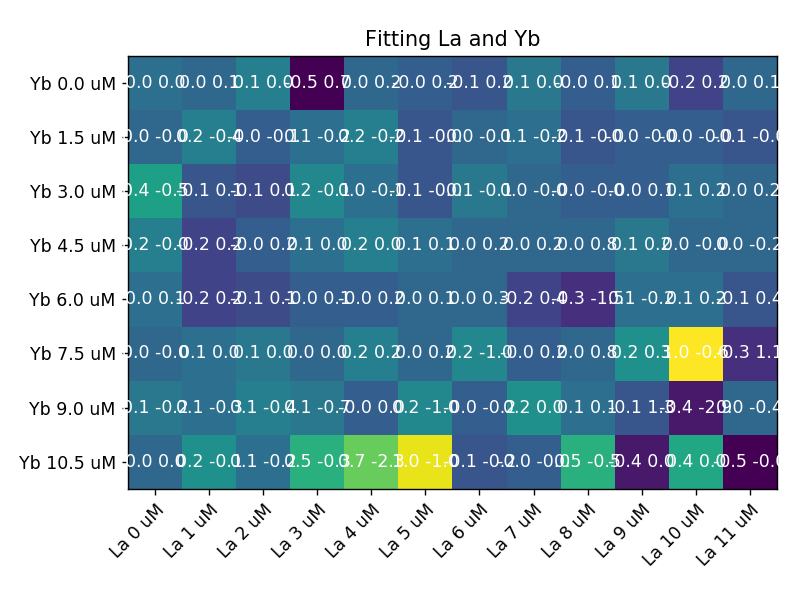

In [10]:
fig, ax = plt.subplots()
im = ax.imshow(diff_la.transpose())

# We want to show all ticks...
ax.set_xticks(np.arange(0,12))
ax.set_yticks(np.arange(0,8))
# ... and label them with the respective list entries
ax.set_xticklabels(ree1_labels)
ax.set_yticklabels(ree2_labels)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(12):
    for j in range(8):
        text = ax.text(i, j, str(np.round(diff_la[i, j],1)) + ' ' + str(np.round(diff_yb[i,j],1)),
                       ha="center", va="center", color="w")

ax.set_title("Fitting La and Yb")
fig.tight_layout()
plt.show()

<IPython.core.display.Javascript object>


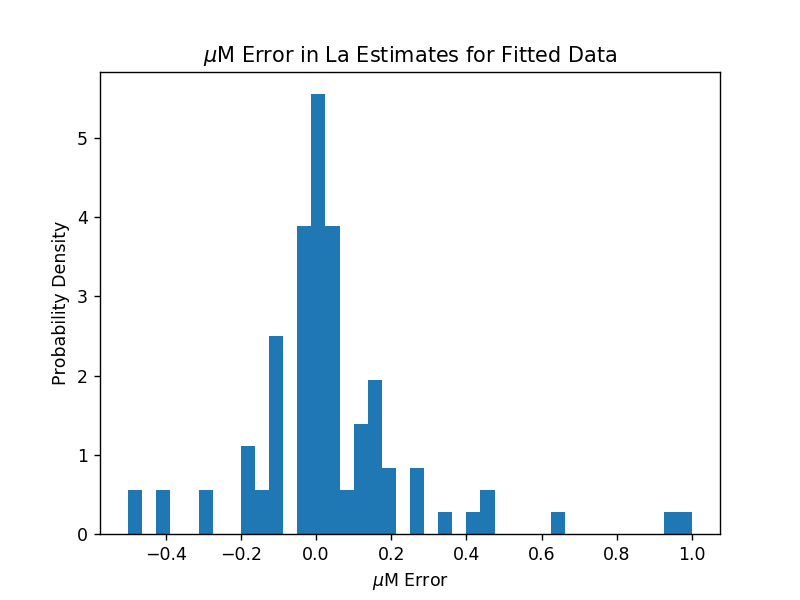

0.13697916666666662


<IPython.core.display.Javascript object>


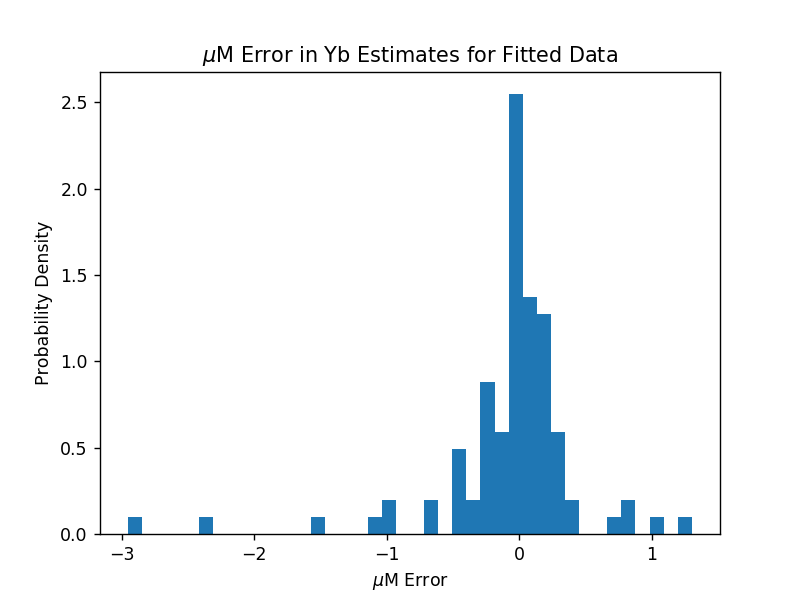

0.29114583333333327


<IPython.core.display.Javascript object>


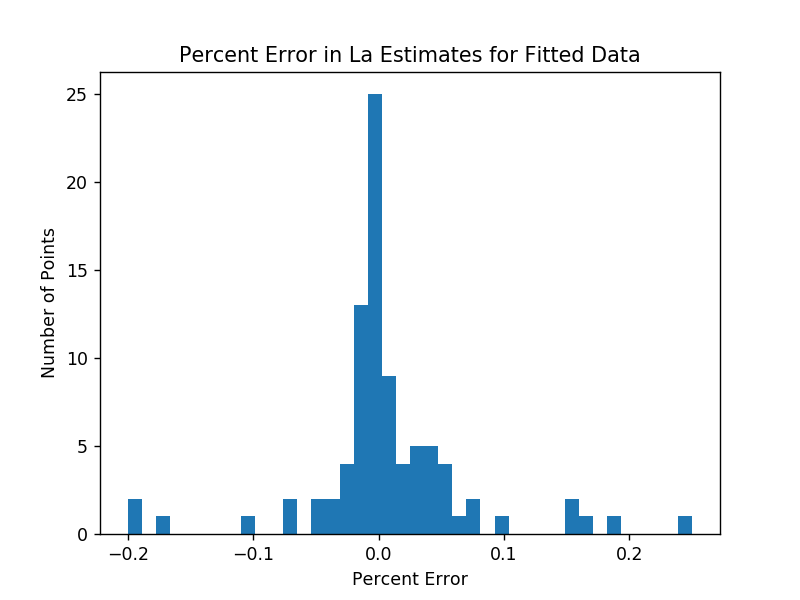

0.036806416437098255


<IPython.core.display.Javascript object>


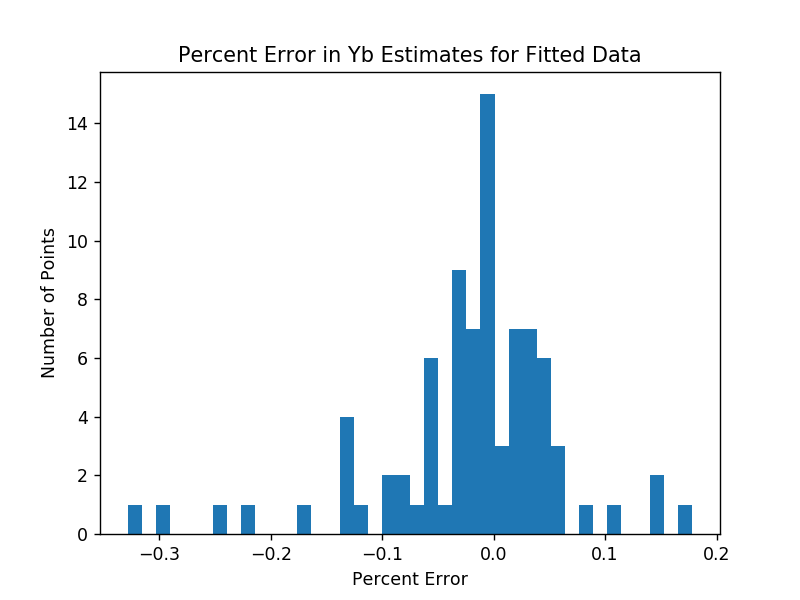

0.05558767951625094


<IPython.core.display.Javascript object>


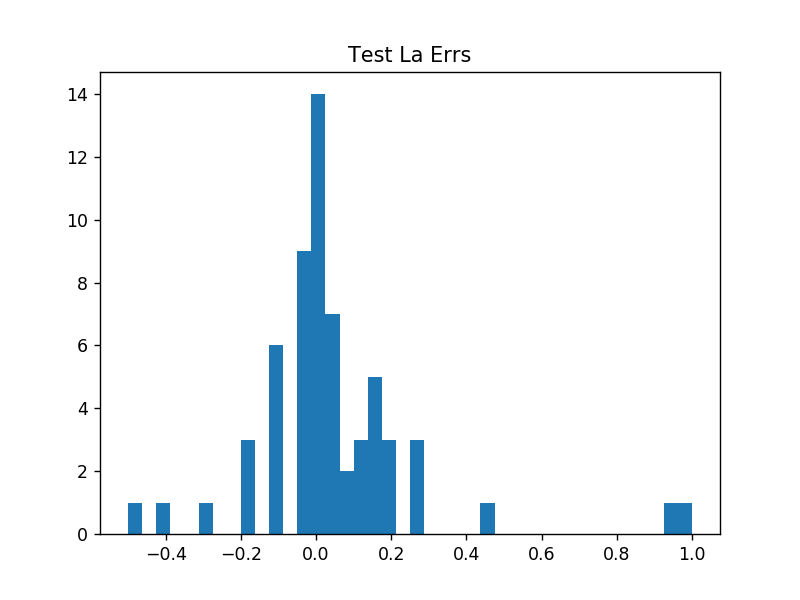

0.13442622950819666


<IPython.core.display.Javascript object>


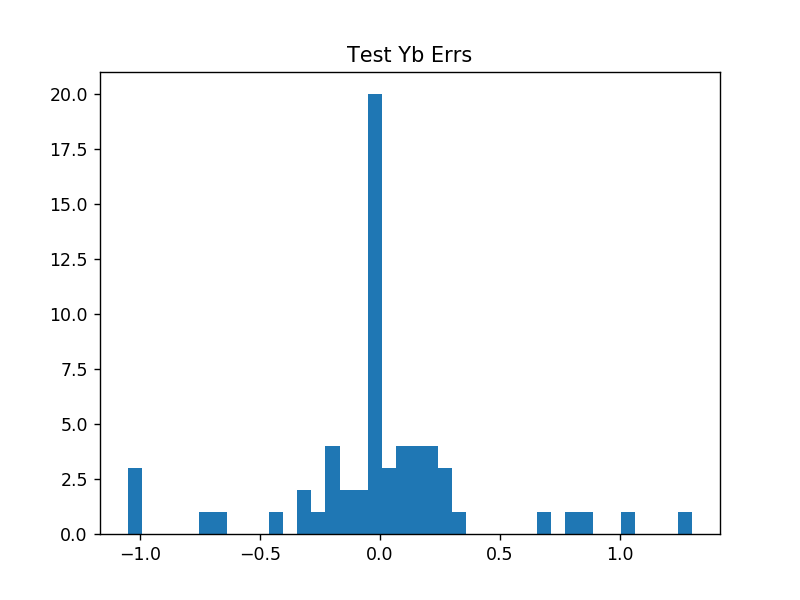

0.2524590163934426


In [11]:
plt.figure()
plt.rcParams['pdf.fonttype'] = 42
plt.hist(diff_la.flatten(),bins=40, density=True)
plt.title('$\mu$M Error in La Estimates for Fitted Data')
plt.xlabel('$\mu$M Error')
plt.ylabel('Probability Density')
print(np.mean(np.abs(diff_la)))
plt.savefig('la_fit_error.pdf')

plt.figure()
plt.hist(diff_yb.flatten(),bins=40, density=True)
plt.title('$\mu$M Error in Yb Estimates for Fitted Data')
plt.xlabel('$\mu$M Error')
plt.ylabel('Probability Density')
print(np.mean(np.abs(diff_yb)))
plt.savefig('yb_fit_error.pdf')

plt.figure()
plt.hist([i for i in diff_la_perc.flatten() if np.isfinite(i)],bins=40)
plt.title('Percent Error in La Estimates for Fitted Data')
plt.xlabel('Percent Error')
plt.ylabel('Number of Points')
print(np.nanmean(np.abs([i for i in diff_la_perc.flatten() if np.isfinite(i)])))

plt.figure()
plt.hist([i for i in diff_yb_perc.flatten() if np.isfinite(i)],bins=40)
plt.title('Percent Error in Yb Estimates for Fitted Data')
plt.xlabel('Percent Error')
plt.ylabel('Number of Points')
print(np.nanmean(np.abs([i for i in diff_yb_perc.flatten() if np.isfinite(i)])))

plt.figure()
plt.hist(test_la_diffs,bins=40)
plt.title('Test La Errs')
print(np.mean(np.abs(test_la_diffs)))

plt.figure()
plt.hist(test_yb_diffs,bins=40)
plt.title('Test Yb Errs')
print(np.mean(np.abs(test_yb_diffs)))

In [12]:
# fits other plate to spline data

ree1_labels = []
ree2_labels = []
for i in range(len(la_concs_test)):
    ree1_labels.append('La ' + str(la_concs_test[i]) + ' uM')
for i in range(len(yb_concs_test)):
    ree2_labels.append('Yb ' + str(yb_concs_test[i]) + ' uM')

diff_la_test = np.zeros((12,8))
diff_yb_test = np.zeros((12,8))
for r in range(1,9):
    for c in range(1,13):
        
        abses = wells_add_test[(r,c)][(600 - nm_start) // nm_step:(680-nm_start) // nm_step]
        best_la,best_yb = get_2ree_from_spline_fast(splines, weights, abses, small, big, step, small, big, step, maps)

        diff_la_test[c-1,r-1] = best_la - la_concs_test[c-1]
        diff_yb_test[c-1,r-1] = best_yb - yb_concs_test[r-1]
    print(r)
       

1
2
3
4
5
6
7
8


<IPython.core.display.Javascript object>


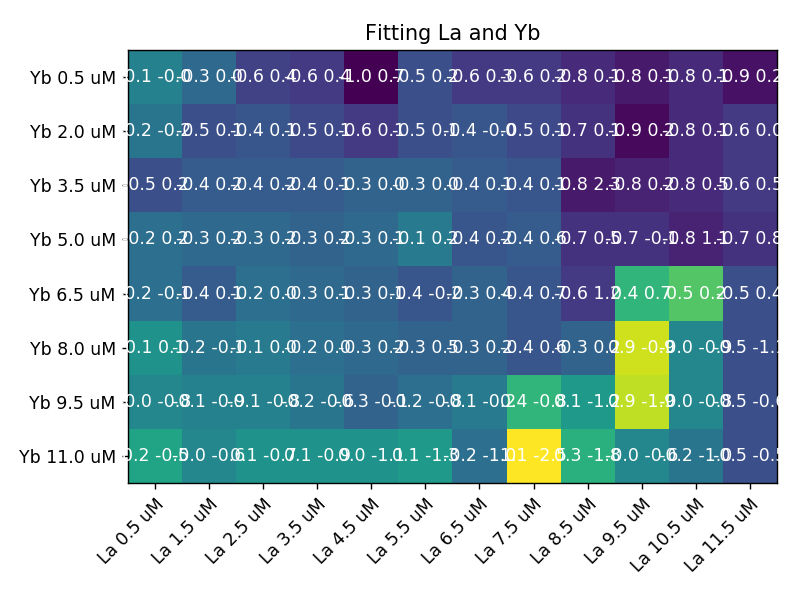

In [13]:
fig, ax = plt.subplots()
im = ax.imshow(diff_la_test.transpose())

# We want to show all ticks...
ax.set_xticks(np.arange(0,12))
ax.set_yticks(np.arange(0,8))
# ... and label them with the respective list entries
ax.set_xticklabels(ree1_labels)
ax.set_yticklabels(ree2_labels)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(12):
    for j in range(8):
        text = ax.text(i, j, str(np.round(diff_la_test[i, j],1)) + ' ' + str(np.round(diff_yb_test[i,j],1)),
                       ha="center", va="center", color="w")

ax.set_title("Fitting La and Yb")
fig.tight_layout()
plt.show()

<IPython.core.display.Javascript object>


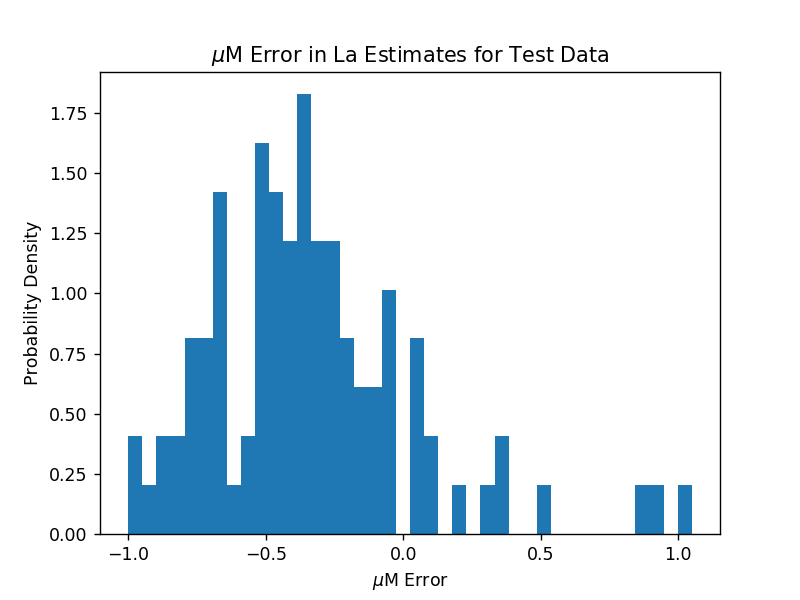

0.42604166666666643


<IPython.core.display.Javascript object>


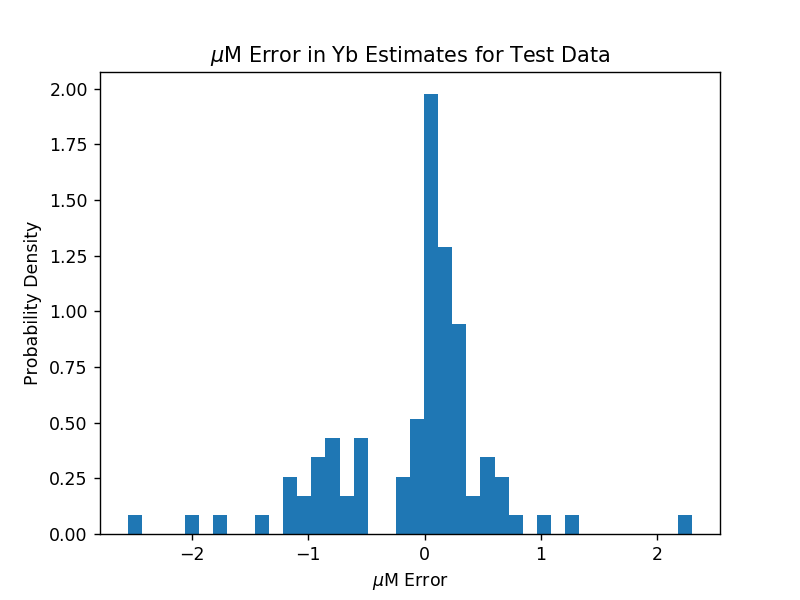

0.45520833333333327


In [14]:
plt.figure()
plt.rcParams['pdf.fonttype'] = 42
plt.hist(diff_la_test.flatten(),bins=40,density=True)
plt.title('$\mu$M Error in La Estimates for Test Data')
plt.xlabel('$\mu$M Error')
plt.ylabel('Probability Density')
print(np.mean(np.abs(diff_la_test)))
plt.savefig('la_test_error.pdf')

plt.figure()
plt.hist(diff_yb_test.flatten(),bins=40,density=True)
plt.title('$\mu$M Error in Yb Estimates for Test Data')
plt.xlabel('$\mu$M Error')
plt.ylabel('Probability Density')
print(np.mean(np.abs(diff_yb_test)))
plt.savefig('yb_test_error.pdf')